# Notebook 5 - Property modeling with Chemical Checker Signatures
By Vincent Blay, November 2021

This notebooks illustrates one possible use of the recent [Chemical Checker signatures](https://www.nature.com/articles/s41467-021-24150-4) instead of molecular descriptors to model some of the properties in this work.

Chemical Checker signaturizers generate 128-D numerical vectors that can be used as conventional molecular descriptors. Each signaturizer is trained on a dataset of different nature. Around 800,000 small molecules and associated data were used in the construction of the Chemical Checker. Type I signatures are generated by applying Latent Semantic Indexing (LSI, a form of dimensionality reduction), to datasets of different nature. Type II signatures are then generated from type I signatures by emedding similarity networks generated from the type I signatures into 128 dimensions using *node2vec*.

In [1]:
pwd

'C:\\Users\\Enka\\Desktop\\LDRD\\macaw_repo\\notebooks'

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

%run "./plotting.py"

In [3]:
from signaturizer import Signaturizer

## Research Octane Number (RON)

Let us load the data and look at the distribution:

In [4]:
df = pd.read_csv("../data/data_RON.csv")
smiles = df.Smiles
Y = df.RON
print(len(smiles))

194


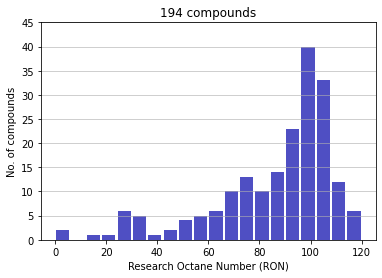

In [5]:
plot_histogram(Y, xlabel="Research Octane Number (RON)")

Let us now compute the signaturizer descriptors:

In [30]:
sign = Signaturizer('B1') # Mechanism of action signaturizer
results = sign.predict(smiles)
D = results.signature

In [31]:
D.shape

(194, 128)

Let us split the data in training and validation sets:

In [32]:
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)

Now we want to select a subset of signatures that we will use to train the model.

In [33]:
%%time

regr = LinearRegression()

sfs = SequentialFeatureSelector(regr, n_features_to_select=15)
sfs.fit(D_train, y_train)

Wall time: 21.8 s


SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=15)

In [34]:
D_train.shape

(155, 128)

Now we use the selected descriptors to train a Support Vector Regressor (SVR) from the `sklearn` package.

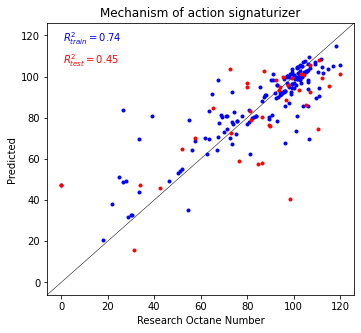

In [35]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Research Octane Number", title='Mechanism of action signaturizer') 

Let us try other signaturizers:

In [36]:
sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(194, 128)


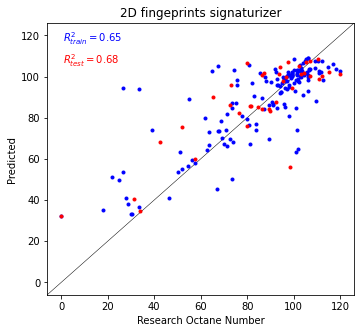

In [37]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Research Octane Number", title='2D fingeprints signaturizer') 

In [38]:
sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(194, 128)


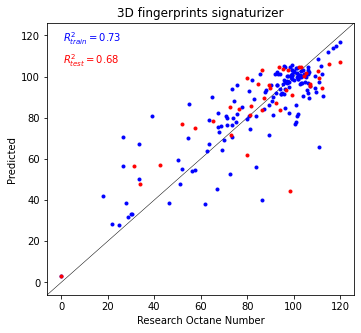

In [39]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Research Octane Number", title='3D fingerprints signaturizer') 

In [40]:
sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(194, 128)


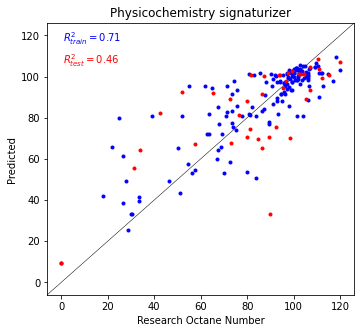

In [41]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Research Octane Number", title="Physicochemistry signaturizer") 

In [42]:
sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(194, 128)


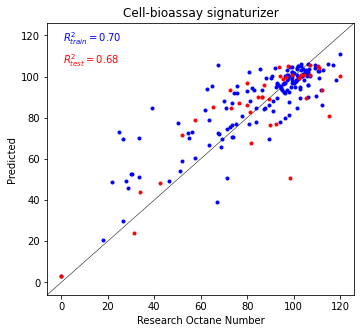

In [43]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Research Octane Number", title="Cell-bioassay signaturizer") 

In [8]:
sign = Signaturizer('B4') # Binding signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(194, 128)


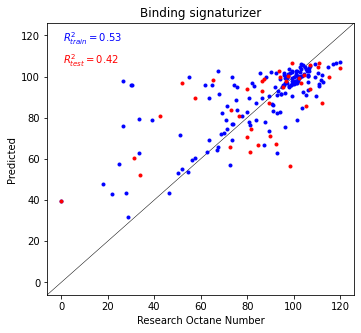

In [9]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Research Octane Number", title="Binding signaturizer") 

## Cetane Number (CN)

In [147]:
df = pd.read_csv("../data/data_CN.csv")
smiles = df.Smiles
Y = df.CN
print(len(smiles))

545


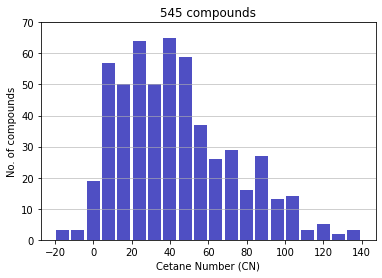

In [148]:
plot_histogram(Y, xlabel="Cetane Number (CN)")

Let us now compute the signaturizer descriptors:

In [149]:
sign = Signaturizer('B1') # Mechanism of action signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(545, 128)


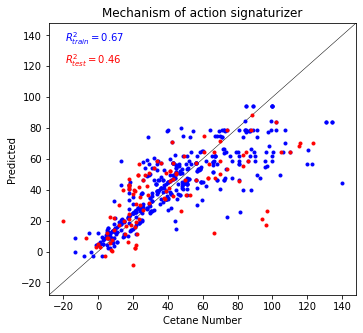

In [150]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Cetane Number", title='Mechanism of action signaturizer') 

In [151]:
sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(545, 128)


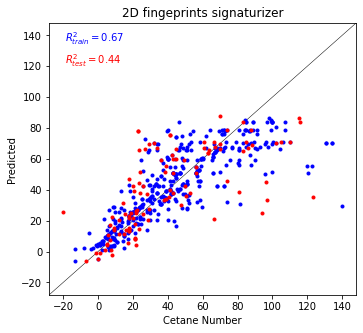

In [152]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Cetane Number", title='2D fingeprints signaturizer') 

In [153]:
sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(545, 128)


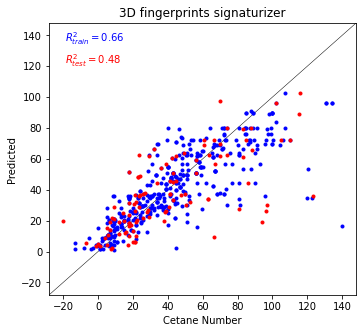

In [154]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Cetane Number", title='3D fingerprints signaturizer') 

In [155]:
sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(545, 128)


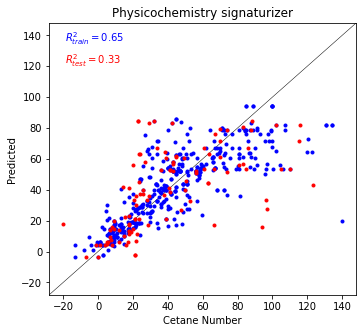

In [156]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Cetane Number", title="Physicochemistry signaturizer") 

In [157]:
sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(545, 128)


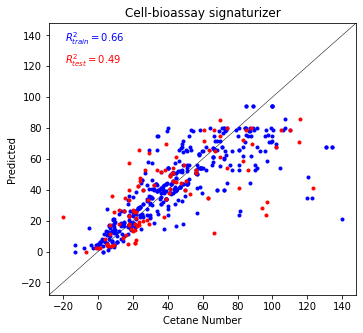

In [158]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Cetane Number", title="Cell-bioassay signaturizer") 

## Yield Sooting Index

In [159]:
df = pd.read_csv("../data/data_YSI.csv")
smiles = df.Smiles
Y = df.YSI
print(len(smiles))

610


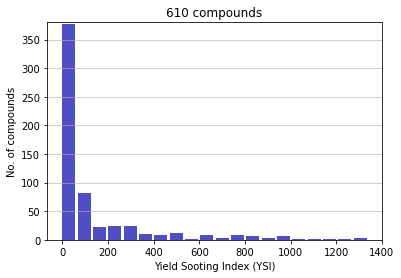

In [160]:
plot_histogram(Y, xlabel="Yield Sooting Index (YSI)")

In [161]:
sign = Signaturizer('B1') # Mechanism of action signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(610, 128)


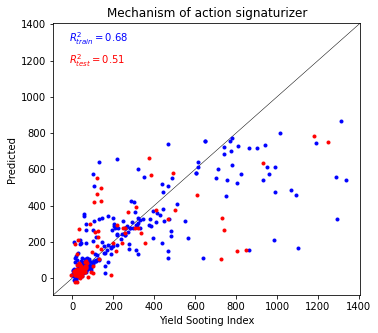

In [162]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Yield Sooting Index", title='Mechanism of action signaturizer') 

In [163]:
sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(610, 128)


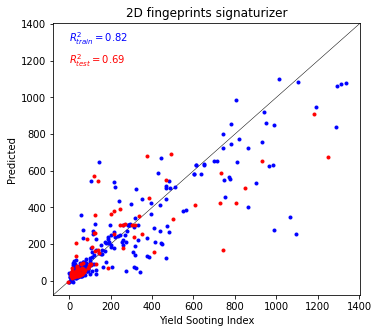

In [164]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Yield Sooting Index", title='2D fingeprints signaturizer') 

In [165]:
sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(610, 128)


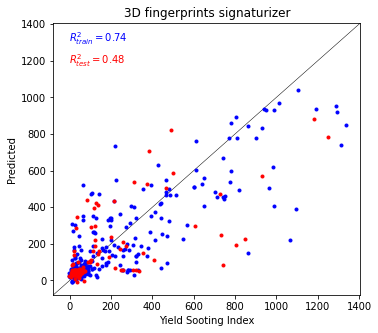

In [166]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Yield Sooting Index", title='3D fingerprints signaturizer') 

In [167]:
sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(610, 128)


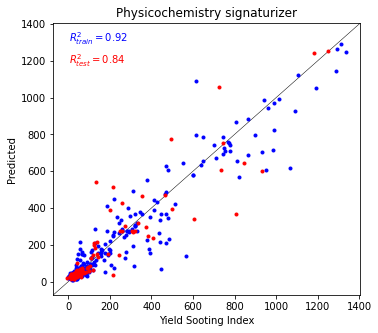

In [168]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Yield Sooting Index", title="Physicochemistry signaturizer") 

In [169]:
sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(610, 128)


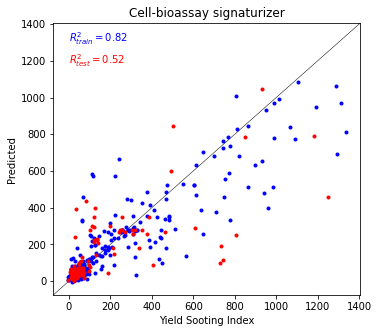

In [170]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=500, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Yield Sooting Index", title="Cell-bioassay signaturizer") 

##  Melting Point (MP)

In [174]:
df = pd.read_csv("../data/data_MP.csv")
smiles = df.Smiles
Y = df.mpC
print(len(smiles))

27976


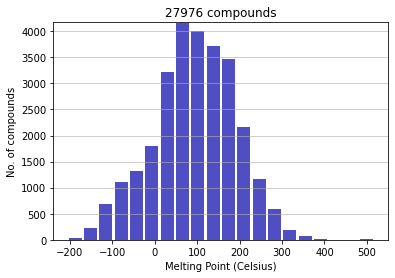

In [175]:
plot_histogram(Y, xlabel="Melting Point (Celsius)")

In [176]:
%%time

sign = Signaturizer('B1') # Mechanism of action signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(27976, 128)
Wall time: 4min 53s


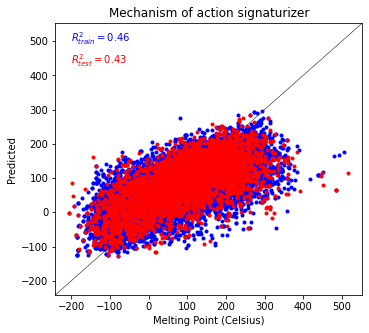

In [177]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Melting Point (Celsius)", title='Mechanism of action signaturizer') 

In [178]:
%%time

sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(27976, 128)
Wall time: 4min 37s


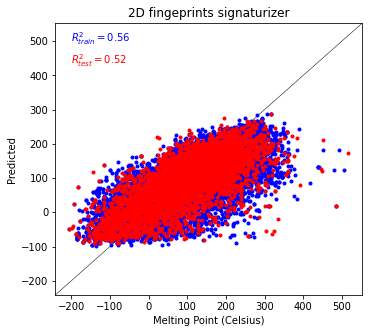

In [179]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Melting Point (Celsius)", title='2D fingeprints signaturizer') 

In [180]:
%%time

sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(27976, 128)
Wall time: 4min 41s


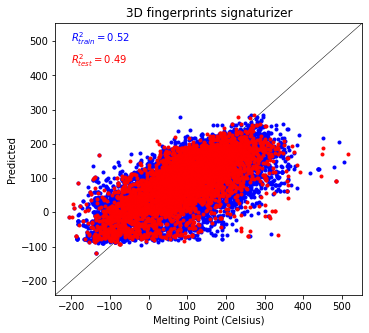

In [181]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Melting Point (Celsius)", title='3D fingerprints signaturizer') 

In [182]:
%%time

sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(27976, 128)
Wall time: 4min 51s


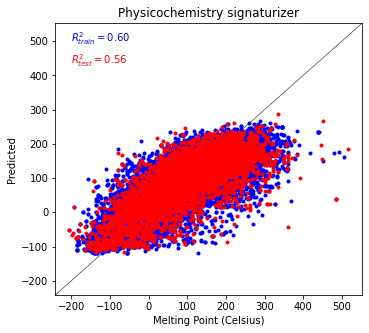

In [183]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Melting Point (Celsius)", title="Physicochemistry signaturizer") 

In [184]:
%%time

sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(27976, 128)
Wall time: 4min 47s


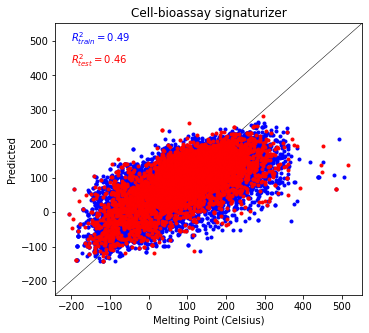

In [185]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=100, epsilon=20)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Melting Point (Celsius)", title="Cell-bioassay signaturizer") 

## Flash Point (FP)

In [135]:
df = pd.read_csv("../data/data_FP.csv")
smiles = df.Smiles
Y = df.FP
print(len(smiles))

631


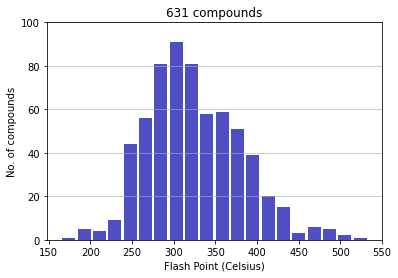

In [136]:
plot_histogram(Y, xlabel="Flash Point (Celsius)")

In [137]:
sign = Signaturizer('B1') # Mechanism of action signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(631, 128)


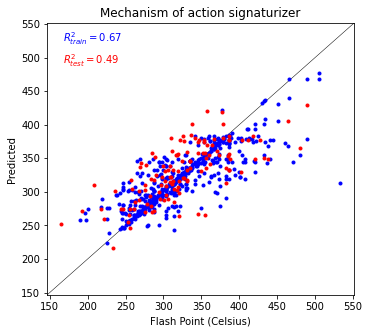

In [138]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=300, epsilon=2)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Flash Point (Celsius)", title='Mechanism of action signaturizer') 

In [139]:
sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(631, 128)


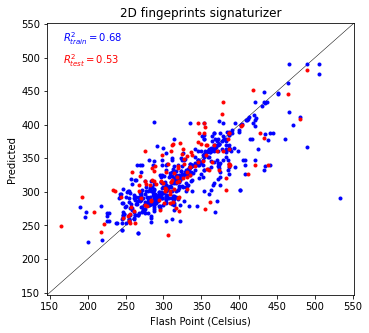

In [140]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=300, epsilon=2)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Flash Point (Celsius)", title='2D fingeprints signaturizer') 

In [141]:
sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(631, 128)


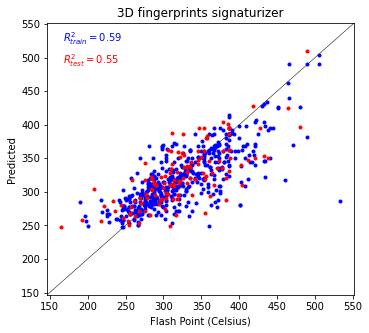

In [142]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=300, epsilon=2)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Flash Point (Celsius)", title='3D fingerprints signaturizer') 

In [143]:
sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(631, 128)


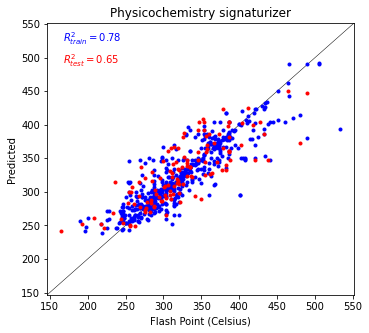

In [144]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=300, epsilon=2)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Flash Point (Celsius)", title="Physicochemistry signaturizer") 

In [145]:
sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(631, 128)


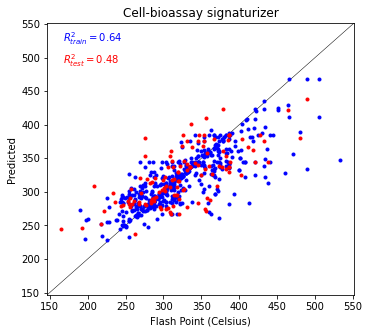

In [146]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=300, epsilon=2)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Flash Point (Celsius)", title="Cell-bioassay signaturizer") 

## Histamine receptor pKi

In [125]:
df = pd.read_csv("../data/data_H1.csv")
Y = df.pKi
smiles = df.Smiles
print(len(smiles))

1214


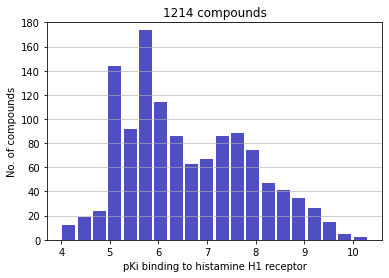

In [126]:
plot_histogram(Y, xlabel="pKi binding to histamine H1 receptor")

In [127]:
sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1214, 128)


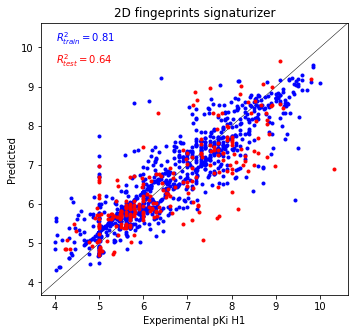

In [128]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel='Experimental pKi H1', title='2D fingeprints signaturizer') 

In [129]:
sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1214, 128)


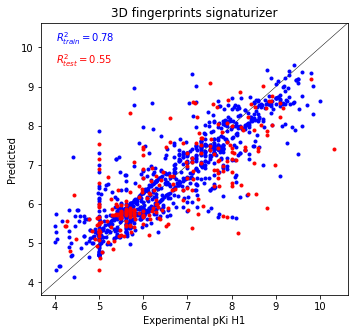

In [130]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel='Experimental pKi H1', title='3D fingerprints signaturizer') 

In [131]:
sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1214, 128)


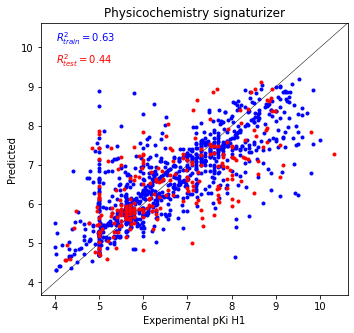

In [132]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel='Experimental pKi H1', title="Physicochemistry signaturizer") 

In [133]:
sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1214, 128)


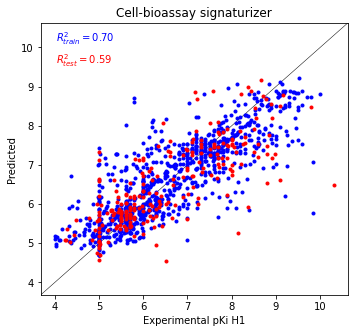

In [134]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=10, epsilon=.3)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel='Experimental pKi H1', title="Cell-bioassay signaturizer") 

## Muscarinic receptor pKi

In [114]:
df = pd.read_csv("../data/data_M2.csv")
Y = df.pKi
smiles = df.Smiles
print(len(smiles))

1145


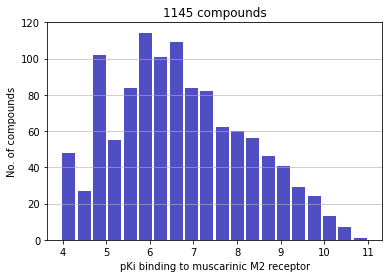

In [115]:
plot_histogram(Y, xlabel="pKi binding to muscarinic M2 receptor")

In [116]:
sign = Signaturizer('A1') # 2D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1145, 128)


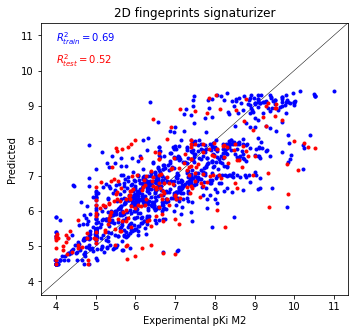

In [117]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=3, epsilon=.5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Experimental pKi M2", title='2D fingeprints signaturizer') 

In [118]:
sign = Signaturizer('A2') # 3D fingerprints signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1145, 128)


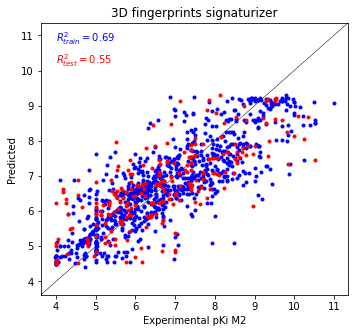

In [119]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=3, epsilon=.5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Experimental pKi M2", title='3D fingerprints signaturizer') 

In [120]:
sign = Signaturizer('A5') # Physicochemistry signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1145, 128)


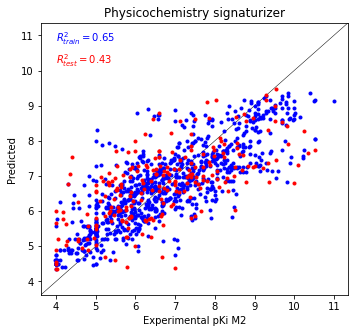

In [121]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=3, epsilon=.5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Experimental pKi M2", title="Physicochemistry signaturizer") 

In [122]:
sign = Signaturizer('D5') # Cell-bioassay signaturizer
D = sign.predict(smiles).signature
D_train, D_test, y_train, y_test = train_test_split(D, Y, test_size = 0.2, random_state = 42)
sfs.fit(D_train, y_train)
print(D.shape)

(1145, 128)


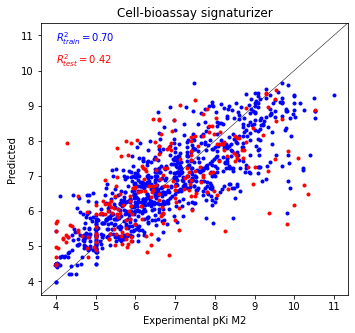

In [123]:
X_train = sfs.transform(D_train)
X_test = sfs.transform(D_test)

regr = SVR(kernel='rbf', C=3, epsilon=.5)
regr.fit(X_train,y_train)

# Train set predictions
y_train_pred = regr.predict(X_train)

# Test set predictions
y_test_pred = regr.predict(X_test)

# Parity plot
parity_plot(x=y_train, y=y_train_pred, x_test=y_test, y_test=y_test_pred,
            xlabel="Experimental pKi M2", title="Cell-bioassay signaturizer") 

In [124]:
X_train

array([[-0.11264252, -0.02862143, -0.003878  , ..., -0.04524652,
         0.05235454,  0.04684968],
       [-0.05659035,  0.08334058,  0.07111535, ...,  0.07070655,
         0.07768387,  0.01485398],
       [-0.07234082, -0.01208747,  0.06523975, ..., -0.0361183 ,
        -0.09759865, -0.10237676],
       ...,
       [ 0.08247755, -0.00073481,  0.09529341, ...,  0.08713505,
        -0.0973666 , -0.08409007],
       [ 0.08152027,  0.0217153 ,  0.09171458, ...,  0.08914067,
        -0.09174024, -0.09039514],
       [-0.01755385,  0.0815364 ,  0.09017695, ...,  0.06798126,
        -0.0644211 , -0.04346823]], dtype=float32)